In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [76]:
#load file
df = pd.read_csv('idp.csv')
#print 
df

,S. No,Catalyst Name,Sub-Catalyst Name,Method ofsynthesis,PH,Temp,Time,Dried,Annealing,H2 via EC/ PEC/ PC,Electrolyte (pH),Current Density,Overpotential @10 mA.cm-2,Stability,H2 evolution (mmol),Efficiency,Cu type,Ref
0,1.0,CuFeS2/rGO,CuS,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,- 210 mA.cm-2 @ -0.6 V (RHE),181.0,NaN,NaN,NaN,Cu as enity-metal,https://doi.org/10.1021/acsanm.3c00056
1,NaN,NaN,FeS2,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,- 225 mA.cm-2 @ -0.6 V (RHE),193.0,NaN,NaN,NaN,Cu as enity-metal,NaN
2,NaN,NaN,CuFeS2,hydrothermal method,NaN,160 °C,16 h,80 °C @ 12 h,NaN,EC,1 M KOH,- 208 mA.cm-2 @ -0.6 V (RHE),168.0,NaN,NaN,NaN,Cu as enity-metal,NaN
3,2.0,CuNiS,NaN,chemical bath deposition.,NaN,NaN,NaN,NaN,NaN,EC,0.1 M KOH,-400 mA/cm2 @ -0.45 V (RHE),99.0,50 h,NaN,high,Cu as enity-metal,https://doi.org/10.1016/j.jcis.2021.07.145
4,3.0,CuCo2S4 NWs,Cu2S/NF,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,-100 mA/cm2 @ -0.23 V (RHE),140.0,NaN,NaN,NaN,Cu as enity-metal,https://doi.org/10.1021/acssuschemeng.8b02155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,170.0,"(Mo, W)-Doped Cu11V6O26",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metal dopped,https://doi.org/10.1021/acs.chemmater.7b03587
438,NaN,NaN,Mo:Cu11V6O26,electrochemical deposition,NaN,80 °C,NaN,NaN,500 °C for 3 h,PEC,0.1 M H3BO3( pH 9.2) +0.1 M (pH 13) KOH,100 mA cm-2 at 1.79V,NaN,2h,NaN,NaN,metal dopped,NaN
439,NaN,NaN,W:Cu11V6O26 (red),electrochemical deposition,NaN,NaN,NaN,NaN,NaN,PEC,0.1 M H3BO3( pH 9.2) +0.1 M (pH 13) KOH,200 mA cm-2 at 1.79V,NaN,2h,NaN,NaN,metal dopped,NaN
440,NaN,NaN,Cu11V6O26,electrochemical deposition,NaN,NaN,NaN,NaN,NaN,PEC,0.1 M H3BO3( pH 9.2) +0.1 M (pH 13) KOH,25 mA cm-2 at 1.79V,NaN,NaN,NaN,NaN,metal dopped,NaN


In [77]:


def replace_missing_values(filename):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)

    # Replace "-" with NaN
    df.replace("-", pd.NA, inplace=True)

    # Write the modified DataFrame back to a CSV file
    df.to_csv(filename, index=False)

filename = 'idp.csv'  # Replace with your CSV file path
replace_missing_values(filename)
print("Missing values represented by '-' have been replaced with 'NaN' in the CSV file.")
df.head()

Missing values represented by '-' have been replaced with 'NaN' in the CSV file.


,S. No,Catalyst Name,Sub-Catalyst Name,Method ofsynthesis,PH,Temp,Time,Dried,Annealing,H2 via EC/ PEC/ PC,Electrolyte (pH),Current Density,Overpotential @10 mA.cm-2,Stability,H2 evolution (mmol),Efficiency,Cu type,Ref
0,1.0,CuFeS2/rGO,CuS,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,- 210 mA.cm-2 @ -0.6 V (RHE),181.0,NaN,NaN,NaN,Cu as enity-metal,https://doi.org/10.1021/acsanm.3c00056
1,NaN,NaN,FeS2,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,- 225 mA.cm-2 @ -0.6 V (RHE),193.0,NaN,NaN,NaN,Cu as enity-metal,NaN
2,NaN,NaN,CuFeS2,hydrothermal method,NaN,160 °C,16 h,80 °C @ 12 h,NaN,EC,1 M KOH,- 208 mA.cm-2 @ -0.6 V (RHE),168.0,NaN,NaN,NaN,Cu as enity-metal,NaN
3,2.0,CuNiS,NaN,chemical bath deposition.,NaN,NaN,NaN,NaN,NaN,EC,0.1 M KOH,-400 mA/cm2 @ -0.45 V (RHE),99.0,50 h,NaN,high,Cu as enity-metal,https://doi.org/10.1016/j.jcis.2021.07.145
4,3.0,CuCo2S4 NWs,Cu2S/NF,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,-100 mA/cm2 @ -0.23 V (RHE),140.0,NaN,NaN,NaN,Cu as enity-metal,https://doi.org/10.1021/acssuschemeng.8b02155


In [78]:

df.dtypes

S. No                        float64
Catalyst Name                 object
Sub-Catalyst Name             object
Method ofsynthesis            object
PH                            object
Temp                          object
Time                          object
Dried                         object
Annealing                     object
H2 via EC/ PEC/ PC            object
Electrolyte (pH)              object
Current Density               object
Overpotential @10 mA.cm-2    float64
Stability                     object
H2 evolution (mmol)           object
Efficiency                    object
Cu type                       object
Ref                           object
dtype: object

In [79]:

df.shape
#df.replace('-', " ", inplace=True)
#df.head()
#df.fillna(0, inplace=True)
#df.replace(' ', "0", inplace=True)
#df.head()

(442, 18)

In [80]:
# Remove leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)
#df.head()

Missing values:
 S. No                        271
Catalyst Name                270
Sub-Catalyst Name             92
Method ofsynthesis            63
PH                           402
Temp                         226
Time                         231
Dried                        269
Annealing                    349
H2 via EC/ PEC/ PC            20
Electrolyte (pH)              66
Current Density               85
Overpotential @10 mA.cm-2    256
Stability                    257
H2 evolution (mmol)          382
Efficiency                   368
Cu type                        0
Ref                          274
dtype: int64


In [81]:
#df.fillna("-", inplace=True)

# Write the modified DataFrame back to a CSV file
#df.to_csv('modified_file.csv', index=False)
def convert_column_to_float(filename, column_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)

    # Convert the specified column to float
    df[column_name] = df[column_name].astype(float)

    # Write the modified DataFrame back to a CSV file
    df.to_csv(filename, index=False)

filename = 'idp.csv'  # Make sure this matches your file's name and path
column_name = 'Overpotential @10 mA.cm-2'  # Replace 'your_column_name' with the actual column name
convert_column_to_float(filename, column_name)
print(f"The datatype of column '{column_name}' has been converted to float.")

The datatype of column 'Overpotential @10 mA.cm-2' has been converted to float.


In [82]:

# Create a duplicate DataFrame for further manipulation
df_duplicate = df.copy()

# Print count of NaN values in 'Overpotential @10 mA.cm-2' column before modification
print("NaN count before modification:")
print(df_duplicate['Overpotential @10 mA.cm-2'].isna().sum())

# Define a list of Cu types
cu_types = ['Cu as enity-metal', 'Cu as enity-CuO', 'dopped CuO', 'metal dopped']

# Loop through each Cu type
for cu_type in cu_types:
    # Step 1: Identify rows where 'Cu type' is the current Cu type
    cu_type_rows = df_duplicate[df_duplicate['Cu type'] == cu_type]
    
    # Step 2: Calculate the mean of 'Overpotential @10 mA.cm-2' for these rows
    overpotential_mean = cu_type_rows['Overpotential @10 mA.cm-2'].mean()
    
    # Print the calculated mean for debugging
    print("Mean Overpotential @10 mA.cm-2 for {}: {}".format(cu_type, overpotential_mean))
    
    # Step 3: Fill empty spaces (NaN) in 'Overpotential @10 mA.cm-2' column of cu_type_rows with the mean
    #cu_type_rows['Overpotential @10 mA.cm-2'].fillna(overpotential_mean, inplace=True)
    cu_type_rows['Overpotential @10 mA.cm-2'].fillna(overpotential_mean, inplace=True)
    # Update the original DataFrame with the filled subset
    df_duplicate.update(cu_type_rows)

# Write the modified DataFrame back to a CSV file
df_duplicate.to_csv('modified_file_duplicate.csv', index=False)

# Print count of NaN values in 'Overpotential @10 mA.cm-2' column after modification
print("NaN count after modification:")
print(df_duplicate['Overpotential @10 mA.cm-2'].isna().sum())

# Save the modified data to a new CSV file
df_duplicate.to_csv("modified_dataset_duplicate.csv", index=False)

# Print the modified dataset
data_duplicate = pd.read_csv('modified_dataset_duplicate.csv')



NaN count before modification:
256
Mean Overpotential @10 mA.cm-2 for Cu as enity-metal: 189.81125000000003
Mean Overpotential @10 mA.cm-2 for Cu as enity-CuO: 232.7684210526316
Mean Overpotential @10 mA.cm-2 for dopped CuO: 214.25
Mean Overpotential @10 mA.cm-2 for metal dopped: 130.10526315789474
NaN count after modification:
0


/var/folders/cz/frvglf1n0wnf63l8jmzx0gwr0000gn/T/ipykernel_8110/1523890239.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cu_type_rows['Overpotential @10 mA.cm-2'].fillna(overpotential_mean, inplace=True)


In [83]:
data_duplicate.shape

(442, 18)

In [84]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


# Create a duplicate DataFrame for further manipulation
df_filled = df.copy()

# Print count of NaN values in 'Overpotential @10 mA.cm-2' column before modification
print("NaN count before modification:")
print(df_filled['Overpotential @10 mA.cm-2'].isna().sum())

# Filter rows where 'Overpotential @10 mA.cm-2' is not NaN (to train the model)
df_train = df_filled.dropna(subset=['Overpotential @10 mA.cm-2'])

# Drop non-numeric columns
df_train_numeric = df_train.select_dtypes(include=['number'])

# Define features (X) and target variable (y) for training
X_train = df_train_numeric.drop(columns=['Overpotential @10 mA.cm-2'])
y_train = df_train_numeric['Overpotential @10 mA.cm-2']

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Filter rows with NaN values in 'Overpotential @10 mA.cm-2' column (to predict)
nan_rows = df_filled[df_filled['Overpotential @10 mA.cm-2'].isna()]

# Drop non-numeric columns
nan_rows_numeric = nan_rows.select_dtypes(include=['number'])

# Impute missing values in nan_rows
nan_rows_imputed = imputer.transform(nan_rows_numeric.drop(columns=['Overpotential @10 mA.cm-2']))

# Predict missing values using the model
predicted_values = model.predict(nan_rows_imputed)

# Fill NaN values in the duplicate DataFrame with predicted values
df_filled.loc[df_filled['Overpotential @10 mA.cm-2'].isna(), 'Overpotential @10 mA.cm-2'] = predicted_values

# Write the modified DataFrame back to a CSV file
df_filled.to_csv('modified_file_linear_regression.csv', index=False)

# Print count of NaN values in 'Overpotential @10 mA.cm-2' column after modification
print("NaN count after modification:")
print(df_filled['Overpotential @10 mA.cm-2'].isna().sum())

# Save the modified data to a new CSV file
df_filled.to_csv("modified_dataset_linear_regression.csv", index=False)

# Print the modified dataset
data_linear_regression = pd.read_csv('modified_dataset_linear_regression.csv')
#data_linear_regression


NaN count before modification:
256
NaN count after modification:
0


In [85]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


# Create a duplicate DataFrame for further manipulation
db_filled = df.copy()

# Print count of NaN values in 'Overpotential @10 mA.cm-2' column before modification
print("NaN count before modification:")
print(db_filled['Overpotential @10 mA.cm-2'].isna().sum())

# Filter rows where 'Overpotential @10 mA.cm-2' is not NaN (to train the model)
db_train = db_filled.dropna(subset=['Overpotential @10 mA.cm-2'])

# Drop non-numeric columns
df_train_numeric = df_train.select_dtypes(include=['number'])

# Define features (X) and target variable (y) for training
X_train = df_train_numeric.drop(columns=['Overpotential @10 mA.cm-2'])
y_train = df_train_numeric['Overpotential @10 mA.cm-2']

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Initialize and fit the Random Forest regressor model
model = RandomForestRegressor()
model.fit(X_train_imputed, y_train)

# Filter rows with NaN values in 'Overpotential @10 mA.cm-2' column (to predict)
nan_rows = db_filled[db_filled['Overpotential @10 mA.cm-2'].isna()]

# Drop non-numeric columns
nan_rows_numeric = nan_rows.select_dtypes(include=['number'])

# Impute missing values in nan_rows
nan_rows_imputed = imputer.transform(nan_rows_numeric.drop(columns=['Overpotential @10 mA.cm-2']))

# Predict missing values using the model
predicted_values = model.predict(nan_rows_imputed)

# Fill NaN values in the duplicate DataFrame with predicted values
db_filled.loc[db_filled['Overpotential @10 mA.cm-2'].isna(), 'Overpotential @10 mA.cm-2'] = predicted_values

# Write the modified DataFrame back to a CSV file
db_filled.to_csv('modified_file_random_forest.csv', index=False)

# Print count of NaN values in 'Overpotential @10 mA.cm-2' column after modification
print("NaN count after modification:")
print(db_filled['Overpotential @10 mA.cm-2'].isna().sum())

# Save the modified data to a new CSV file
db_filled.to_csv("modified_dataset_random_forest.csv", index=False)

# Print the modified dataset
data_random_forest = pd.read_csv('modified_dataset_random_forest.csv')
#data_random_forest


NaN count before modification:
256
NaN count after modification:
0


In [86]:
import pandas as pd

# Read the three CSV files into pandas DataFrames
df_duplicate = pd.read_csv('modified_dataset_duplicate.csv')
df_linear_regression = pd.read_csv('modified_dataset_linear_regression.csv')
df_random_forests = pd.read_csv('modified_dataset_random_forests.csv')

# Check if all DataFrames have the same number of rows
if not all(len(df) == len(df_duplicate) for df in [df_linear_regression, df_random_forests]):
    raise ValueError("Number of rows in the DataFrames do not match.")

# Create a new DataFrame to store the result
result_df = df_duplicate.copy()

# Iterate over indices of all DataFrames simultaneously
for index in range(len(df_duplicate)):
    for col in df_duplicate.columns:
        # Convert values to numeric type
        val_duplicate = pd.to_numeric(df_duplicate.at[index, col], errors='coerce')
        val_linear_regression = pd.to_numeric(df_linear_regression.at[index, col], errors='coerce')
        val_random_forests = pd.to_numeric(df_random_forests.at[index, col], errors='coerce')
        
        # Check if values are numeric
        if not pd.isna(val_duplicate) and not pd.isna(val_linear_regression) and not pd.isna(val_random_forests):
            # Check if values are the same in all three DataFrames
            if (val_duplicate == val_linear_regression == val_random_forests):
                # If all values are the same, keep the value as is
                result_df.at[index, col] = df_duplicate.at[index, col]
            else:
                # If values differ, replace with the average
                result_df.at[index, col] = (val_duplicate + val_linear_regression + val_random_forests) / 3
        else:
            # If any value is not numeric, keep it as is
            result_df.at[index, col] = df_duplicate.at[index, col]

# Write the result to a new CSV file
result_df.to_csv('result.csv', index=False)
dc= pd.read_csv('result.csv') # Print the modified dataset
dc

,S. No,Catalyst Name,Sub-Catalyst Name,Method ofsynthesis,PH,Temp,Time,Dried,Annealing,H2 via EC/ PEC/ PC,Electrolyte (pH),Current Density,Overpotential @10 mA.cm-2,Stability,H2 evolution (mmol),Efficiency,Cu type,Ref
0,1.0,CuFeS2/rGO,CuS,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,- 210 mA.cm-2 @ -0.6 V (RHE),181.000000,NaN,NaN,NaN,Cu as enity-metal,https://doi.org/10.1021/acsanm.3c00056
1,NaN,NaN,FeS2,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,- 225 mA.cm-2 @ -0.6 V (RHE),193.000000,NaN,NaN,NaN,Cu as enity-metal,NaN
2,NaN,NaN,CuFeS2,hydrothermal method,NaN,160 °C,16 h,80 °C @ 12 h,NaN,EC,1 M KOH,- 208 mA.cm-2 @ -0.6 V (RHE),168.000000,NaN,NaN,NaN,Cu as enity-metal,NaN
3,2.0,CuNiS,NaN,chemical bath deposition.,NaN,NaN,NaN,NaN,NaN,EC,0.1 M KOH,-400 mA/cm2 @ -0.45 V (RHE),99.000000,50 h,NaN,high,Cu as enity-metal,https://doi.org/10.1016/j.jcis.2021.07.145
4,3.0,CuCo2S4 NWs,Cu2S/NF,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,-100 mA/cm2 @ -0.23 V (RHE),140.000000,NaN,NaN,NaN,Cu as enity-metal,https://doi.org/10.1021/acssuschemeng.8b02155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,170.0,"(Mo, W)-Doped Cu11V6O26",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.326910,NaN,NaN,NaN,metal dopped,https://doi.org/10.1021/acs.chemmater.7b03587
438,NaN,NaN,Mo:Cu11V6O26,electrochemical deposition,NaN,80 °C,NaN,NaN,500 °C for 3 h,PEC,0.1 M H3BO3( pH 9.2) +0.1 M (pH 13) KOH,100 mA cm-2 at 1.79V,149.935872,2h,NaN,NaN,metal dopped,NaN
439,NaN,NaN,W:Cu11V6O26 (red),electrochemical deposition,NaN,NaN,NaN,NaN,NaN,PEC,0.1 M H3BO3( pH 9.2) +0.1 M (pH 13) KOH,200 mA cm-2 at 1.79V,149.935872,2h,NaN,NaN,metal dopped,NaN
440,NaN,NaN,Cu11V6O26,electrochemical deposition,NaN,NaN,NaN,NaN,NaN,PEC,0.1 M H3BO3( pH 9.2) +0.1 M (pH 13) KOH,25 mA cm-2 at 1.79V,149.935872,NaN,NaN,NaN,metal dopped,NaN


In [87]:
import csv
csv_file_path = 'result.csv'

# Replace 'column_name' with the name of the column you want to print
column_name = 'Overpotential @10 mA.cm-2'

# Open the CSV file
with open(csv_file_path, 'r') as file:
    reader = csv.DictReader(file)
    
    # Loop through each row in the CSV file
    for row in reader:
        # Print the value of the specified column for each row
        print(row[column_name])

181.0
193.0
168.0
99.0
140.0
65.0
240.0
190.0
118.0
117.0
105.0
128.0
194.0
210.0
447.0
140.0
180.0
41.0
220.0
186.01715471835112
162.0
105.0
145.0
385.0
211.1
203.0
263.0
149.0
198.0
118.0
165.0
115.0
145.0
175.0
200.0
82.0
129.0
110.0
161.0
189.51316415364033
186.01715471835112
186.01715471835112
186.01715471835112
189.44105395138456
186.01715471835112
186.01715471835112
186.01715471835112
189.3689437491288
186.01715471835112
186.01715471835112
186.01715471835112
186.01715471835112
191.0
42.0
38.0
284.0
156.0
189.15261314236147
86.0
186.01715471835112
186.01715471835112
186.01715471835112
330.0
312.0
96.0
186.01715471835112
420.0
186.01715471835112
300.0
186.01715471835112
121.0
156.0
200.0
228.0
347.0
432.0
69.0
445.0
580.0
534.0
354.0
320.0
141.0
188.57573152431527
186.01715471835112
158.0
148.7
188.43151111980373
186.01715471835112
110.0
668.0
280.0
290.0
397.0
42.0
64.0
38.0
76.0
128.41708045418352
188.14307031078064
186.01715471835112
186.01715471835112
186.01715471835112
186.01

In [88]:
import pandas as pd
import numpy as np
import re

def parse_stability(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip().lower()
    
    # Match patterns like "10 h", "20 min", "100 cycles", etc.
    hours_match = re.match(r'(\d+(\.\d+)?)\s*h', value)
    minutes_match = re.match(r'(\d+(\.\d+)?)\s*min', value)
    cycles_match = re.match(r'(\d+(\.\d+)?)\s*cycles', value)
    seconds_match = re.match(r'(\d+(\.\d+)?)\s*s', value)
    
    if hours_match:
        return float(hours_match.group(1))
    elif minutes_match:
        return float(minutes_match.group(1)) / 60
    elif cycles_match:
        return float(cycles_match.group(1))  # You may want to normalize cycles differently
    elif seconds_match:
        return float(seconds_match.group(1)) / 3600
    else:
        # Handle qualitative descriptions (optional)
        qualitative_values = {
            'long-termstability': 100,
            'excellent': 100,
            'high': 75,
            'good': 60,
            'decentstability': 25,
            'poor': 0.4,
            'better photostability': 2,
            'latticestable': 0.0005,
            'low': 0.005,
            'lowstability': 0.001
        }
        return qualitative_values.get(value, np.nan)

# Example DataFrame based on your provided values
data = {
    'Stability': ['50 h', '10 h', '20 h', '1000 cycles', '30 min', 'high', 'better photostability', '20 min', '10h', '24 h', 'long-termstability', 'good']
}
dc = pd.DataFrame(data)

# Apply the parsing function to the Stability column
dc['Stability'] = dc['Stability'].apply(parse_stability)
print(dc)


      Stability
0     50.000000
1     10.000000
2     20.000000
3   1000.000000
4      0.500000
5     75.000000
6      2.000000
7      0.333333
8     10.000000
9     24.000000
10   100.000000
11    60.000000


In [89]:
num_columns = dc.select_dtypes(include=['float64', 'int64']).columns
cat_columns = dc.select_dtypes(include=['object']).columns

print(f"Numerical columns: {num_columns}")
print(f"Categorical columns: {cat_columns}")


Numerical columns: Index(['Stability'], dtype='object')
Categorical columns: Index([], dtype='object')


In [90]:
print(dc[num_columns].info())
print(dc[cat_columns].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Stability  12 non-null     float64
dtypes: float64(1)
memory usage: 228.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Empty DataFrame
None


In [91]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming dc is your DataFrame
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
num_columns = dc.select_dtypes(include=['float64', 'int64']).columns
if not num_columns.empty:
    dc[num_columns] = num_imputer.fit_transform(dc[num_columns])

# Impute categorical columns
cat_columns = dc.select_dtypes(include=['object']).columns
if not cat_columns.empty:
    dc[cat_columns] = cat_imputer.fit_transform(dc[cat_columns])


In [92]:
for col in num_columns:
    if dc[col].isnull().all():
        dc[col] = num_imputer.fit_transform(dc[[col]])
    else:
        dc[col] = num_imputer.fit_transform(dc[col].values.reshape(-1, 1))

for col in cat_columns:
    if dc[col].isnull().all():
        dc[col] = cat_imputer.fit_transform(dc[[col]])
    else:
        dc[col] = cat_imputer.fit_transform(dc[col].values.reshape(-1, 1))


In [93]:
print(dc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Stability  12 non-null     float64
dtypes: float64(1)
memory usage: 228.0 bytes
None


In [94]:
print(dc.columns)

Index(['Stability'], dtype='object')


In [95]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical columns
num_features = dc.select_dtypes(include=['float64', 'int64']).columns
cat_features = dc.select_dtypes(include=['object']).columns

# Create transformers
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Apply transformations
X = preprocessor.fit_transform(dc)

# Assuming the target columns are 'Stability'
y_stability = dc['Stability']
y_stability

0       50.000000
1       10.000000
2       20.000000
3     1000.000000
4        0.500000
5       75.000000
6        2.000000
7        0.333333
8       10.000000
9       24.000000
10     100.000000
11      60.000000
Name: Stability, dtype: float64

In [96]:
import pandas as pd

# Load the data from idp 3.csv file
dc_overpotential = pd.read_csv('result.csv')

# Assuming 'Stability' and 'Overpotential @10 mA.cm-2' are columns in dc and df_overpotential respectively
# If the columns have different names, adjust accordingly

# Combine the two DataFrames on a common index or key column
# Merge the two DataFrames without a common column
dc_merged = pd.concat([dc, dc_overpotential], axis=1)

# Print both 'Stability' and 'Overpotential @10 mA.cm-2' values together
print(dc_merged[['Stability', 'Overpotential @10 mA.cm-2']])


    Stability Stability  Overpotential @10 mA.cm-2
0        50.0       NaN                 181.000000
1        10.0       NaN                 193.000000
2        20.0       NaN                 168.000000
3      1000.0      50 h                  99.000000
4         0.5       NaN                 140.000000
..        ...       ...                        ...
437       NaN       NaN                 142.326910
438       NaN        2h                 149.935872
439       NaN        2h                 149.935872
440       NaN       NaN                 149.935872
441       NaN       NaN                  58.000000

[442 rows x 3 columns]


In [97]:
from sklearn.model_selection import train_test_split

# Define target variables
y_overpotential = dc_merged['Overpotential @10 mA.cm-2']
y_stability = dc_merged['Stability']

# Drop the target variables from the merged DataFrame to obtain the features DataFrame
X = dc_merged.drop(columns=['Overpotential @10 mA.cm-2', 'Stability'])

# Split the data
X_train_op, X_test_op, y_train_op, y_test_op = train_test_split(X, y_overpotential, test_size=0.2, random_state=42)
X_train_stab, X_test_stab, y_train_stab, y_test_stab = train_test_split(X, y_stability, test_size=0.2, random_state=42)


In [98]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data
dc = pd.read_csv('idp 3.csv')

# Function to parse stability values
def parse_stability(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip().lower()
    
    # Match patterns like "10 h", "20 min", "100 cycles", etc.
    hours_match = re.match(r'(\d+(\.\d+)?)\s*h', value)
    minutes_match = re.match(r'(\d+(\.\d+)?)\s*min', value)
    cycles_match = re.match(r'(\d+(\.\d+)?)\s*cycles', value)
    seconds_match = re.match(r'(\d+(\.\d+)?)\s*s', value)
    
    if hours_match:
        return float(hours_match.group(1))
    elif minutes_match:
        return float(minutes_match.group(1)) / 60
    elif cycles_match:
        return float(cycles_match.group(1))  # You may want to normalize cycles differently
    elif seconds_match:
        return float(seconds_match.group(1)) / 3600
    else:
        # Handle qualitative descriptions (optional)
        qualitative_values = {
            'long-termstability': 100,
            'excellent': 100,
            'high': 75,
            'good': 60,
            'decentstability': 25,
            'poor': 0.4,
            'better photostability': 2,
            'latticestable': 0.0005,
            'low': 0.005,
            'lowstability': 0.001
        }
        return qualitative_values.get(value, np.nan)

# Apply the parsing function to the Stability column
df['Stability'] = df['Stability'].apply(parse_stability)
df['Stability']


0       NaN
1       NaN
2       NaN
3      50.0
4       NaN
       ... 
437     NaN
438     2.0
439     2.0
440     NaN
441     NaN
Name: Stability, Length: 442, dtype: float64

In [99]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the data
dc = pd.read_csv('result.csv')

# Function to parse stability values
def parse_stability(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip().lower()
    
    # Match patterns like "10 h", "20 min", "100 cycles", etc.
    hours_match = re.match(r'(\d+(\.\d+)?)\s*h', value)
    minutes_match = re.match(r'(\d+(\.\d+)?)\s*min', value)
    cycles_match = re.match(r'(\d+(\.\d+)?)\s*cycles', value)
    seconds_match = re.match(r'(\d+(\.\d+)?)\s*s', value)
    
    if hours_match:
        return float(hours_match.group(1))
    elif minutes_match:
        return float(minutes_match.group(1)) / 60
    elif cycles_match:
        return float(cycles_match.group(1))  # You may want to normalize cycles differently
    elif seconds_match:
        return float(seconds_match.group(1)) / 3600
    else:
        # Handle qualitative descriptions (optional)
        qualitative_values = {
            'long-termstability': 100,
            'excellent': 100,
            'high': 75,
            'good': 60,
            'decentstability': 25,
            'poor': 0.4,
            'better photostability': 2,
            'latticestable': 0.0005,
            'low': 0.005,
            'lowstability': 0.001
        }
        return qualitative_values.get(value, np.nan)

# Apply the parsing function to the Stability column
dc['Stability'] = dc['Stability'].apply(parse_stability)

# Identify numerical and categorical columns
num_features = dc.select_dtypes(include=['float64', 'int64']).columns.drop('Stability')
cat_features = dc.select_dtypes(include=['object']).columns

# Create transformers
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Split the data into features and target
X = dc.drop(columns=['Stability'])
y = dc['Stability']

# Handle missing target values by dropping them
X = X[y.notna()]
y = y.dropna()

# Split data into training and test sets for predicting stability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert to dense arrays and numeric types to check for NaN and infinite values
X_train = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test = X_test.toarray() if hasattr(X_test, "toarray") else X_test

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# Ensure there are no NaN or infinite values in the transformed data
assert not np.isnan(X_train).any(), "NaN values found in X_train"
assert not np.isinf(X_train).any(), "Infinite values found in X_train"

# Fit a RandomForestRegressor model to predict Stability
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict missing stability values in the original dataset
dc_missing_stability = dc[dc['Stability'].isna()]
X_missing = dc_missing_stability.drop(columns=['Stability'])
X_missing = preprocessor.transform(X_missing)

# Convert X_missing to dense array and numeric types to ensure compatibility
X_missing = X_missing.toarray() if hasattr(X_missing, "toarray") else X_missing
X_missing = X_missing.astype(np.float64)

# Predict and fill the missing stability values
dc.loc[dc['Stability'].isna(), 'Stability'] = rf.predict(X_missing)

# Save the combined data to a new CSV file
dc.to_csv('catalyst_data_with_predictions.csv', index=False)
dc


,S. No,Catalyst Name,Sub-Catalyst Name,Method ofsynthesis,PH,Temp,Time,Dried,Annealing,H2 via EC/ PEC/ PC,Electrolyte (pH),Current Density,Overpotential @10 mA.cm-2,Stability,H2 evolution (mmol),Efficiency,Cu type,Ref
0,1.0,CuFeS2/rGO,CuS,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,- 210 mA.cm-2 @ -0.6 V (RHE),181.000000,141.940000,NaN,NaN,Cu as enity-metal,https://doi.org/10.1021/acsanm.3c00056
1,NaN,NaN,FeS2,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,- 225 mA.cm-2 @ -0.6 V (RHE),193.000000,112.460000,NaN,NaN,Cu as enity-metal,NaN
2,NaN,NaN,CuFeS2,hydrothermal method,NaN,160 °C,16 h,80 °C @ 12 h,NaN,EC,1 M KOH,- 208 mA.cm-2 @ -0.6 V (RHE),168.000000,107.580000,NaN,NaN,Cu as enity-metal,NaN
3,2.0,CuNiS,NaN,chemical bath deposition.,NaN,NaN,NaN,NaN,NaN,EC,0.1 M KOH,-400 mA/cm2 @ -0.45 V (RHE),99.000000,50.000000,NaN,high,Cu as enity-metal,https://doi.org/10.1016/j.jcis.2021.07.145
4,3.0,CuCo2S4 NWs,Cu2S/NF,NaN,NaN,NaN,NaN,NaN,NaN,EC,1 M KOH,-100 mA/cm2 @ -0.23 V (RHE),140.000000,53.640000,NaN,NaN,Cu as enity-metal,https://doi.org/10.1021/acssuschemeng.8b02155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,170.0,"(Mo, W)-Doped Cu11V6O26",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.326910,164.850000,NaN,NaN,metal dopped,https://doi.org/10.1021/acs.chemmater.7b03587
438,NaN,NaN,Mo:Cu11V6O26,electrochemical deposition,NaN,80 °C,NaN,NaN,500 °C for 3 h,PEC,0.1 M H3BO3( pH 9.2) +0.1 M (pH 13) KOH,100 mA cm-2 at 1.79V,149.935872,2.000000,NaN,NaN,metal dopped,NaN
439,NaN,NaN,W:Cu11V6O26 (red),electrochemical deposition,NaN,NaN,NaN,NaN,NaN,PEC,0.1 M H3BO3( pH 9.2) +0.1 M (pH 13) KOH,200 mA cm-2 at 1.79V,149.935872,2.000000,NaN,NaN,metal dopped,NaN
440,NaN,NaN,Cu11V6O26,electrochemical deposition,NaN,NaN,NaN,NaN,NaN,PEC,0.1 M H3BO3( pH 9.2) +0.1 M (pH 13) KOH,25 mA cm-2 at 1.79V,149.935872,2.087056,NaN,NaN,metal dopped,NaN


In [44]:
"""import csv
csv_file_path = 'catalyst_data_with_predictions.csv'

# Replace 'column_name' with the name of the column you want to print
column_name = 'Stability'

# Open the CSV file
with open(csv_file_path, 'r') as file:
    reader = csv.DictReader(file)
    
    # Loop through each row in the CSV file
    for row in reader:
        # Print the value of the specified column for each row
        print(row[column_name])"""

"import csv\ncsv_file_path = 'catalyst_data_with_predictions.csv'\n\n# Replace 'column_name' with the name of the column you want to print\ncolumn_name = 'Stability'\n\n# Open the CSV file\nwith open(csv_file_path, 'r') as file:\n    reader = csv.DictReader(file)\n    \n    # Loop through each row in the CSV file\n    for row in reader:\n        # Print the value of the specified column for each row\n        print(row[column_name])"

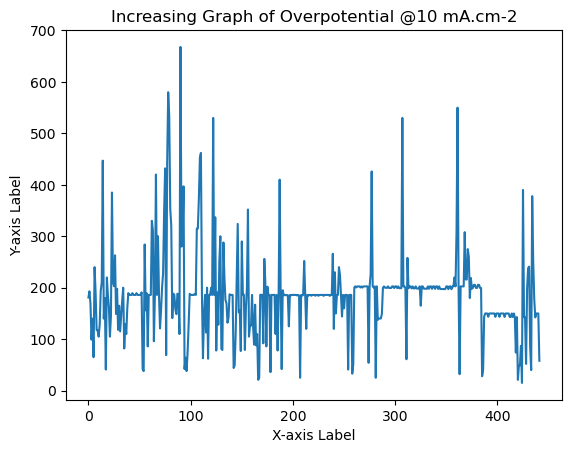

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
dc = pd.read_csv('catalyst_data_with_predictions.csv')

# Assuming 'Overpotential @10 mA.cm-2' is the correct column name
overpotential_10_mA_cm2 = dc['Overpotential @10 mA.cm-2']

# Plot the data
plt.plot(overpotential_10_mA_cm2)
plt.title('Increasing Graph of Overpotential @10 mA.cm-2')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


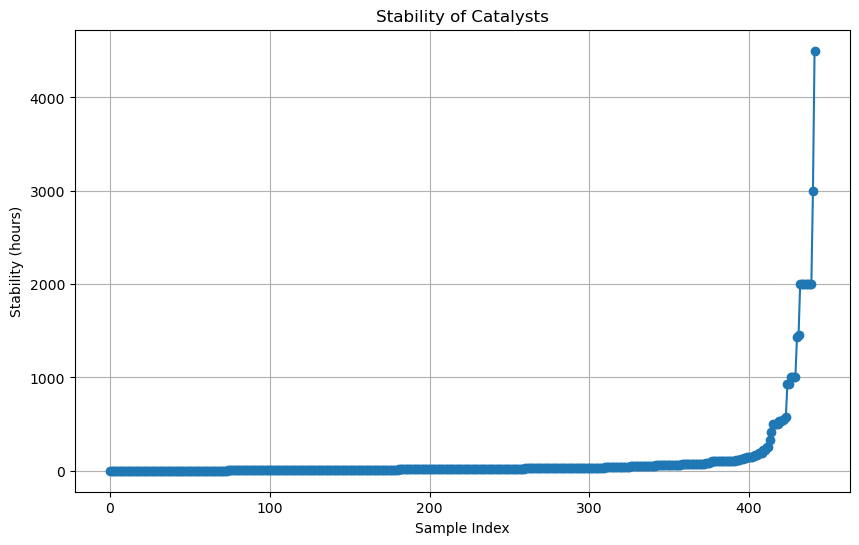

In [101]:
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Sort the DataFrame by Stability
dc_sorted = dc.sort_values(by='Stability').reset_index(drop=True)

# Plot a line graph for Stability
# Plot a line graph for Stability
plt.figure(figsize=(10, 6))
plt.plot(dc_sorted.index, dc_sorted['Stability'], marker='o')
plt.title('Stability of Catalysts')
plt.xlabel('Sample Index')
plt.ylabel('Stability (hours)')
plt.grid(True)
plt.show()


In [102]:
# Filter out rows where 'Overpotential @10 mA.cm-2' is zero
filtered_dc = dc[dc['Overpotential @10 mA.cm-2'] != 0]

# Filter out rows where 'Catalyst Name' is not null
filtered_dc = filtered_dc[filtered_dc['Catalyst Name'].notnull()]

# Sort the filtered DataFrame by 'Overpotential @10 mA.cm-2' in ascending order
sorted_dc = filtered_dc.sort_values(by='Overpotential @10 mA.cm-2')

# Get the top 10 rows with the lowest overpotential values
top_10_low_overpotential = sorted_dc.head()
print("Lowest overpotential values:")
# Print only the 'Catalyst Name', 'Sub-Catalyst Name', 'Overpotential @10 mA.cm-2', and 'Ref' columns
(top_10_low_overpotential[['Catalyst Name', 'Sub-Catalyst Name', 'Overpotential @10 mA.cm-2', 'Ref']])


Lowest overpotential values:


,Catalyst Name,Sub-Catalyst Name,Overpotential @10 mA.cm-2,Ref
420,Ni-O-VOxsites into Cu-doped,Ni(Cu)VOx,21.0,https://www.nature.com/articles/s41467-020-165...
207,Cu2S,NaN,25.0,https://doi.org/10.1021/acsenergylett.7b01326
281,Cu2O,Cu2O,25.0,https://doi.org/10.1021/acs.nanolett.5b04929
385,Ru/Cu doped RuO2 (S),s-400-H,28.0,https://doi.org/10.1002/smll.201803009
363,Ru/Cu2+1O,NaN,32.0,https://doi.org/10.1002/chem.201904337


In [103]:
# Sort the DataFrame by Stability in descending order
dc_sorted = dc.sort_values(by='Stability', ascending=False)

# Filter out rows where 'Catalyst Name' is not null
dc_sorted = dc_sorted[dc_sorted['Catalyst Name'].notnull()]

# Print the rows with the highest stability values
print("Rows with Highest Stability:")
highstability=dc_sorted.head()
(highstability[['Catalyst Name', 'Sub-Catalyst Name', 'Stability', 'Ref']])


Rows with Highest Stability:


,Catalyst Name,Sub-Catalyst Name,Stability,Ref
385,Ru/Cu doped RuO2 (S),s-400-H,4500.0,https://doi.org/10.1002/smll.201803009
154,MoS2/Cu,MoS2/Cu,3000.0,https://doi.org/10.1016/j.matdes.2021.109674
70,CuNi3S2,CuNi3S2/NF,2000.0,10.1039/D0NR07275C
248,Ni–Cr@CF(Copper foam (CF)),NaN,2000.0,https://doi.org/10.1016/j.ijhydene.2020.09.026
35,Cu2-xS@Ru NPs,Cu2-xS@Ru NPs thick,2000.0,https://doi.org/10.1002/smll.201700052


In [ ]:

# Filter the DataFrame based on user input for overpotential and stability
def filter_catalysts_user(dc, overpotential=None, stability=None):
    filtered_dc = dc
    if overpotential is not None:
        filtered_dc = filtered_dc[(filtered_dc['Overpotential @10 mA.cm-2'] >= overpotential[0]) & (filtered_dc['Overpotential @10 mA.cm-2'] <= overpotential[1])]
    if stability is not None:
        filtered_dc = filtered_dc[(filtered_dc['Stability'] >= stability[0]) & (filtered_dc['Stability'] <= stability[1])]
    return filtered_dc[['Catalyst Name', 'Sub-Catalyst Name', 'Overpotential @10 mA.cm-2', 'Stability', 'Ref']]

# Get user input for overpotential and stability
overpotential_min = float(input("Enter the minimum overpotential: "))
overpotential_max = float(input("Enter the maximum overpotential: "))
stability_min = float(input("Enter the minimum stability: "))
stability_max = float(input("Enter the maximum stability: "))

# Define the ranges based on user input
overpotential_range = (overpotential_min, overpotential_max)
stability_range = (stability_min, stability_max)

# Filter and print the results
filtered_catalysts = filter_catalysts_user(df, overpotential_range, stability_range)
filtered_catalysts


Enter the minimum overpotential: 50


In [51]:
import csv

def find_properties(catalyst):
    with open('catalyst_data_with_predictions.csv', mode='r', newline='') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['Catalyst Name'].lower() == catalyst.lower():
                return row['Stability'], row['Overpotential @10 mA.cm-2']
    return None, None

def main():
    user_input = input("Enter a catalyst: ")
    
    stability, potential = find_properties(user_input)
    if stability is not None and potential is not None:
        print(f"The stability of '{user_input}' is: {stability}")
        print(f"The overpotential of '{user_input}' is: {potential}")
    else:
        print(f"No information found for '{user_input}'.")

if __name__ == "__main__":
    main()

Enter a catalyst: CuNiS
The stability of 'CuNiS' is: 50.0
The overpotential of 'CuNiS' is: 99.0


In [52]:

# Filter rows where Catalyst Name and H2 evolution (mmol) are not null
dc = dc.dropna(subset=['Catalyst Name', 'H2 evolution (mmol)'])

# Filter rows with high stability (assuming higher numerical value means higher stability)
high_stability_dc = dc[dc['Stability'] > 10]

# Filter rows with low overpotential (assuming lower numerical value means lower overpotential)
low_overpotential_dc = dc[dc['Overpotential @10 mA.cm-2'] < 150]

# Merge the two filtered dataframes to get rows with both high stability and low overpotential
filtered_dc = pd.merge(high_stability_dc, low_overpotential_dc, how='inner')

# Select only the specified columns
filtered_dc = filtered_dc[['Catalyst Name', 'Sub-Catalyst Name', 'Method ofsynthesis','Electrolyte (pH)', 'H2 evolution (mmol)',
                           'Current Density', 'Stability', 'Overpotential @10 mA.cm-2']]

# Print the first 5 rows
filtered_dc.head(5)


,Catalyst Name,Sub-Catalyst Name,Method ofsynthesis,Electrolyte (pH),H2 evolution (mmol),Current Density,Stability,Overpotential @10 mA.cm-2
0,Cu3P@NF,Cu3P@NF,hydrothermal method on Ni foam,0.1 M KOH,1100 mmol @60 min,50 mA/cm2 @ -0.25 V (RHE),24.0,105.0
1,Cu3N–CuO,Cu3N/NF,Insitu Formation,0.1 M KOH,3.5ml in 50 h,-300 mA/cm2 @ -0.4 V (RHE),14.0,118.0
2,Ni/Cu/CF electrode,Ni/Cu/CF electrode,galvanostatic electrodeposition,1 M KOH,15 vol/ml in 20 min,-150 mA/cm2 @ -0.18 V (RHE),50.0,38.0
3,CuNi3S2,CuNi3S2/NF,Ni foams pretreated in CuCl2solution,1 M KOH,9 ml @ 30 min,-210 mA/cm2 @ -0.25 V (RHE),2000.0,121.0
4,Cu3Se2@CoSe2–NiSe2/PNCF,Cu3Se2@CoSe2–NiSe2/PNCF,facile hydrothermal method,1.0 M KOH,∼1.52,10 mA cm–2 @-1.3V,1000.0,42.0


In [53]:

# Drop rows with missing values in Stability and Overpotential columns
dc.dropna(subset=['Stability', 'Overpotential @10 mA.cm-2'], inplace=True)

# Sort the DataFrame by Stability (descending order) and then by Overpotential (ascending order)
dc_sorted = dc.sort_values(by=['Stability', 'Overpotential @10 mA.cm-2'], ascending=[False, True])

# Filter the DataFrame to select rows with high stability and low overpotential
efficient_catalysts = dc_sorted[(dc_sorted['Stability'] < 10) & 
                                (dc_sorted['Overpotential @10 mA.cm-2'] < 150)]

# Select the method of synthesis for the most efficient catalyst
most_efficient_method = efficient_catalysts.iloc[0]['Method ofsynthesis']

print("The method of synthesis for catalysts with high stability and low overpotential is:", most_efficient_method)


The method of synthesis for catalysts with high stability and low overpotential is: solvothermal method, 0.0075 g copper acetate


In [54]:
# Drop rows with missing values in Stability and H2 via EC/PC/PEC columns
dc.dropna(subset=['Stability', 'H2 via EC/ PEC/ PC'], inplace=True)

# Group the DataFrame by the method of synthesis (H2 via EC/PC/PEC)
grouped = dc.groupby('H2 via EC/ PEC/ PC')

# Calculate the mean stability for each group
mean_stability = grouped['Stability'].mean()

# Find the group with the highest mean stability
best_group = mean_stability.idxmax()
highest_mean_stability = mean_stability.max()

# Print the mean stability for each group
print("Mean stability for each group:")
print(mean_stability)

# Print the best group with the highest mean stability
print("\nThe group with the highest mean stability is:", best_group)
print("Mean stability of the best group:", highest_mean_stability)


Mean stability for each group:
H2 via EC/ PEC/ PC
EC     319.600000
PC      15.929167
PEC     11.440041
Name: Stability, dtype: float64

The group with the highest mean stability is: EC
Mean stability of the best group: 319.6


In [69]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('idp.csv')

# Function to parse stability values
def parse_stability(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip().lower()
    
    # Match patterns like "10 h", "20 min", "100 cycles", etc.
    hours_match = re.match(r'(\d+(\.\d+)?)\s*h', value)
    minutes_match = re.match(r'(\d+(\.\d+)?)\s*min', value)
    cycles_match = re.match(r'(\d+(\.\d+)?)\s*cycles', value)
    seconds_match = re.match(r'(\d+(\.\d+)?)\s*s', value)
    
    if hours_match:
        return float(hours_match.group(1))
    elif minutes_match:
        return float(minutes_match.group(1)) / 60
    elif cycles_match:
        return float(cycles_match.group(1))  # You may want to normalize cycles differently
    elif seconds_match:
        return float(seconds_match.group(1)) / 3600
    else:
        # Handle qualitative descriptions (optional)
        qualitative_values = {
            'long-termstability': 100,
            'excellent': 100,
            'high': 75,
            'good': 60,
            'decentstability': 25,
            'poor': 0.4,
            'better photostability': 2,
            'latticestable': 0.0005,
            'low': 0.005,
            'lowstability': 0.001
        }
        return qualitative_values.get(value, np.nan)

# Apply the parsing function to the Stability column
df['Stability'] = df['Stability'].apply(parse_stability)

# Select the feature columns (for simplicity, only numerical columns directly related to the prediction)
features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Stability' in features:
    features.remove('Stability')

# Handle missing values for numerical features
if features:
    imputer = SimpleImputer(strategy='mean')
    df[features] = imputer.fit_transform(df[features])
else:
    print("No numeric features available for imputation.")

# Ensure the target column 'Stability' has no NaN values
df['Stability'] = df['Stability'].fillna(df['Stability'].mean())

# Check for NaN or infinite values after imputation in numeric columns
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.isnull().values.any() or not np.isfinite(numeric_df.values).all():
    # Print the rows with NaN or infinite values
    print("Rows with NaN or infinite values after imputation:")
    print(numeric_df[numeric_df.isnull().any(axis=1) | np.isnan(numeric_df).any(axis=1) | np.isinf(numeric_df).any(axis=1)])
    print("\nPlease check your data preprocessing steps.")
else:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df[features], df['Stability'], test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Function to get or predict stability
    def get_or_predict_stability(catalyst_name, search_type):
        if search_type == 'entity':
            catalyst_data = df[(df['Catalyst Name'] == catalyst_name)]
        elif search_type == 'doping element':
            catalyst_data = df[(df['Sub-Catalyst Name'] == catalyst_name)]
        
        if not catalyst_data.empty:
            return catalyst_data
        else:
            # Predict stability for a new catalyst (using mean values of features as an example)
            new_data = pd.DataFrame([df[features].mean()], columns=features)
            predicted_stability = model.predict(new_data)
            new_entry = {
                'Catalyst Name': catalyst_name if search_type == 'entity' else np.nan,
                'Sub-Catalyst Name': catalyst_name if search_type == 'doping element' else np.nan,
                'Stability': predicted_stability[0]
            }
            return pd.DataFrame([new_entry])

    # User input
    search_type = input("Enter the search type (entity or doping element): ").strip().lower()
    catalyst_name = input("Enter the catalyst or sub-catalyst name: ").strip()

    # Get stability
    stability_data = get_or_predict_stability(catalyst_name, search_type)

    # Print the results row-wise
    if stability_data.empty:
        print(f"The predicted stability for {catalyst_name} is not available.")
    else:
        for index, row in stability_data.iterrows():
            print(f"Catalyst Name: {row['Catalyst Name']}, Sub-Catalyst Name: {row['Sub-Catalyst Name']}, Stability: {row['Stability']:.2f} hours or cycles.")

Enter the search type (entity or doping element): entity
Enter the catalyst or sub-catalyst name: CuNiS
Catalyst Name: CuNiS, Sub-Catalyst Name: nan, Stability: 50.00 hours or cycles.


In [74]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('idp.csv')

# Function to parse stability values
def parse_stability(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip().lower()
    
    # Match patterns like "10 h", "20 min", "100 cycles", etc.
    hours_match = re.match(r'(\d+(\.\d+)?)\s*h', value)
    minutes_match = re.match(r'(\d+(\.\d+)?)\s*min', value)
    cycles_match = re.match(r'(\d+(\.\d+)?)\s*cycles', value)
    seconds_match = re.match(r'(\d+(\.\d+)?)\s*s', value)
    
    if hours_match:
        return float(hours_match.group(1))
    elif minutes_match:
        return float(minutes_match.group(1)) / 60
    elif cycles_match:
        return float(cycles_match.group(1))  # You may want to normalize cycles differently
    elif seconds_match:
        return float(seconds_match.group(1)) / 3600
    else:
        # Handle qualitative descriptions (optional)
        qualitative_values = {
            'long-termstability': 100,
            'excellent': 100,
            'high': 75,
            'good': 60,
            'decentstability': 25,
            'poor': 0.4,
            'better photostability': 2,
            'latticestable': 0.0005,
            'low': 0.005,
            'lowstability': 0.001
        }
        return qualitative_values.get(value, np.nan)

# Apply the parsing function to the Stability column
df['Stability'] = df['Stability'].apply(parse_stability)

# Handle missing values for Stability column
df['Stability'] = df['Stability'].fillna(df['Stability'].mean())

# Function to identify outliers using the IQR method for the Stability column
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

# Identify outliers in the Stability column
stability_outliers = identify_outliers(df['Stability'])

# Print the outliers
if not stability_outliers.empty:
    print("Outliers in Stability column:")
    print(stability_outliers)
else:
    print("No outliers detected in Stability column.")

Outliers in Stability column:
35     2000.0
37     2000.0
70     2000.0
71     2000.0
72     2000.0
73     2000.0
94     1000.0
98     1000.0
107     500.0
108     500.0
109     500.0
110     500.0
154    3000.0
155    2000.0
211    1000.0
248    2000.0
385    4500.0
433    1000.0
Name: Stability, dtype: float64
